In [13]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import os

In [18]:
# 读取文件数据
def read_G(your_name):
    GD = []
    GP = []

    f_P = open(f"{your_name}-GP.txt", 'r')
    f_D = open(f"{your_name}-GD.txt", 'r')
    for each_P in f_P:
        GP.append(float(each_P.replace('\n', '')))
    for each_D in f_D:
        GD.append(float(each_D.replace('\n', '')))
    
    return abs(np.array(GP)), abs(np.array(GD))
# 进行拟合
def my_fit(your_name, save=False):
    
    GP_ori, GD_ori = read_G(your_name)

    # 归一化方法1：
    # GP_nor = GP_ori/max(GP_ori)
    # GD_nor = GD_ori/max(GD_ori)

    # 归一化方法2：
    # GP_nor = (GP_ori-min(GP_ori))/(max(GP_ori)-min(GP_ori))
    # GD_nor = (GD_ori-min(GD_ori))/(max(GD_ori)-min(GD_ori))

    # 归一化方法3：
    GP_nor = (GP_ori-min(GP_ori))/(max(GP_ori)-min(GP_ori))
    GD_nor = (GD_ori-min(GD_ori))/(max(GD_ori)-min(GD_ori))

    P = np.arange(1, int(len(GP_ori)), 1)
    D = np.arange(1, int(len(GD_ori)), 1)

    GPmax = max(GP_nor)
    GPmin = min(GP_nor)
    GDmax = max(GD_nor)
    GDmin = min(GD_nor)
    xP = GP_nor[:-1]
    yP = GP_nor[1:]
    xD = GD_nor[:-1]
    yD = GD_nor[1:]

    print(f'GP-max:{GPmax}, GP-min:{GPmin}')
    print(f'GD-max:{GDmax}, GD-min:{GDmin}')

    # 电导拟合公式 其中aP，aD为拟合参数，bP与bD为非线性度
    def delt_GP(xP, bP, aP):
        yP = xP + aP * np.exp(-bP * ((xP - GPmin) / (GPmax - GPmin)))
        return yP
    def delt_GD(xD, bD, aD):
        yD = xD + aD * np.exp(-bD * ((GDmax - xD) / (GDmax - GDmin)))
        return yD

    # 电导数据拟合
    np.random.seed(0)
    def curve_fit_GP(P, xP, yP, your_name, save=False, save_name='-GP'):
        # yP 段拟合数据
        while True:
            err_stdev = 0 # 0.2
            yP_noise = err_stdev * np.random.normal(size=yP.size)
            yP_data = yP + yP_noise
            popt, pcov = curve_fit(delt_GP, xP, yP_data)#训练函数
            bP = popt[0]
            aP = popt[1]
            if bP < 0:
                continue
            else:
                break
        yPvals=delt_GP(xP, bP, aP)
        plt.plot(P, yP, '*',label='original values')
        plt.plot(P, yPvals, 'r',label='curve_fit values')
        # plt.ylim(0, 1)
        plt.xlabel('P axis')
        plt.ylabel('GP axis')
        plt.legend(loc=4)
        plt.title(f"{your_name} curve_fit aP = %0.2f, bP = %0.2f" %(aP, bP))
        if save:
            plt.savefig(your_name + save_name + '.png', dpi=720)
            np.savetxt(your_name + save_name + '.txt', yPvals)
            print("GP-拟合图象与拟合数据已保存！")
        plt.show()
        return yPvals, GPmax
    def curve_fit_GD(D, xD, yD, your_name, save=False, save_name='-GD'):
        # yD 段拟合数据
        while True:
            err_stdev = 0 # 0.2
            yD_noise = err_stdev * np.random.normal(size=xD.size)
            yD_data = yD + yD_noise
            popt, pcov = curve_fit(delt_GD, xD, yD_data)#训练函数
            bD = popt[0]
            aD = popt[1]
            if bD < 0:
                continue
            else:
                break
        yDvals=delt_GD(xD, bD, aD)
        plt.plot(D, yD, '*',label='original values')
        plt.plot(D, yDvals, 'r',label='curve_fit values')
        # plt.ylim(0,1)
        plt.xlabel('D axis')
        plt.ylabel('GD axis')
        plt.legend(loc=3)
        plt.title(f"{your_name} curve_fit aD = %0.2f, bD = %0.2f" %(aD, bD))
        if save:
            plt.savefig(your_name + save_name + '.png', dpi=720)
            np.savetxt(your_name + save_name + '.txt', yDvals)
            print("GD-拟合图象与拟合数据已保存！")
        plt.show()
        return yDvals, GDmax


    if save:
        np.savetxt(f"{your_name}-GP_nor.txt", GP_nor)
        np.savetxt(f"{your_name}-GD_nor.txt", GD_nor)
        print("归一化电导数据已保存！")

    yPvals, yP = curve_fit_GP(P, xP, yP, your_name, save)
    yDvals, yD = curve_fit_GD(D, xD, yD, your_name, save)
    return yPvals, yP, yDvals, yD

# 主函数
def main(save):
    your_name = input("请输入你的文件标识(如: 张三的'zs'))")
    yPvals, yP, yDvals, yD = my_fit(your_name, save)
    print("请自行记录下图片中拟合参数的数值！")
    return yPvals, yP, yDvals, yD

GP-max:1.0, GP-min:0.0
GD-max:1.0, GD-min:0.0


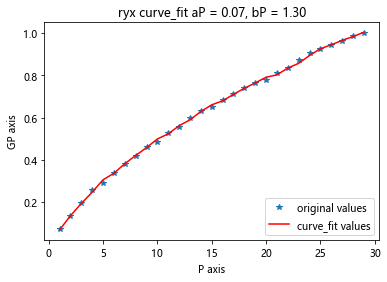

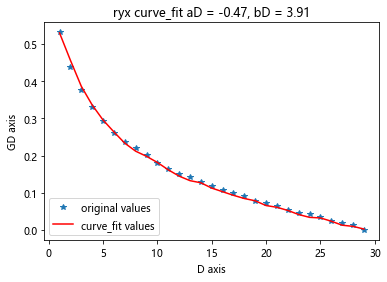

请自行记录下图片中拟合参数的数值！
1.0
1.0


In [20]:
yPvals, yP, yDvals, yD = main(save=False)
print(yP)
print(yD)

In [4]:
GP_ori, GD_ori = read_G('ryx') 
GP_nor = (GP_ori-min(GP_ori))/(max(GP_ori)-min(GP_ori))
GD_nor = (GD_ori-min(GP_ori))/(max(GP_ori)-min(GP_ori))

P = np.arange(1, int(len(GP_ori)), 1)

GPmax = max(GP_nor)
GPmin = min(GP_nor)
GDmax = max(GD_nor)
GDmin = min(GD_nor)

xP = GP_nor[:-1]
yP = GP_nor[1:]
xD = GD_nor[:-1]
yD = GD_nor[1:]

# 电导拟合公式 其中aP，aD为拟合参数，bP与bD为非线性度
def delt_GP(xP, bP, aP):
    yP = xP + aP * np.exp(-bP * ((xP - GPmin) / (GPmax - GPmin)))
    return yP
def delt_GD(xD, bD, aD):
    yD = xD + aD * np.exp(-bD * ((GDmax - xD) / (GDmax - GDmin)))
    return yD

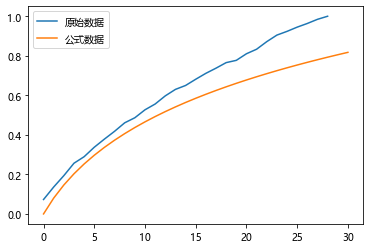

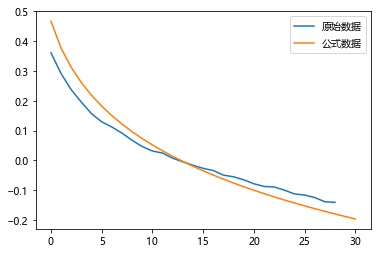

In [7]:
# GP段
y_P = [GPmin]
for i in range(len(GP_ori)):
    y_P.append(delt_GP(y_P[-1], bP=2.35, aP=0.08))
plt.plot(yP, label='原始数据')
plt.plot(y_P, label='公式数据')
plt.legend()
plt.show()
# GD段
y_D = [GDmax]
for i in range(len(GD_ori)):
    y_D.append(delt_GD(y_D[-1], bD=2.22, aD=-0.09))
plt.plot(yD, label='原始数据')
plt.plot(y_D, label='公式数据')
plt.legend()
plt.show()

In [6]:
parameters = {
    'a+': 0.01, 'b+': 2.35,
    'a-': 0.01, 'b-': 2.22,
    'wmax': 1, 'wmin': 0
}
weight_plus_list = [parameters['wmin']]
weight_minus_list = [parameters['wmax']]
def weight_plus(w):
    delta_w = parameters['a+'] * np.exp(-parameters['b+']*(w-parameters['wmin'])
                                             /(parameters['wmax']-parameters['wmin']))
    return delta_w
def weight_minus(w):
    delta_w = parameters['a-'] * np.exp(-parameters['b-']*(parameters['wmax']-w)
                                             /(parameters['wmax']-parameters['wmin']))
    return delta_w
def equation():
    count_num = 0
    while True:
        weight_plus_list.append(weight_plus_list[-1]+weight_plus(weight_plus_list[-1]))
        weight_minus_list.append(weight_minus_list[-1]-weight_minus(weight_minus_list[-1]))
        count_num += 1
        if weight_plus_list[-1] >= 1:
            break
        elif count_num == 50:
            break
        else:
            continue
    
    wpl = [(each - weight_plus_list[0]) / (weight_plus_list[-1]-weight_plus_list[0]) for each in weight_plus_list]
    wml = [(each - weight_minus_list[-1]) / (weight_minus_list[0]-weight_minus_list[-1]) for each in weight_minus_list]

    return np.array(wpl), np.array(wml)

GP, GD = equation()

GP_tmp = np.loadtxt("ryx-GP_nor.txt")
GD_tmp = np.loadtxt("ryx-GD_nor.txt")

plt.plot(GP_tmp,    ls='-',     c='blue')
plt.plot(GD_tmp,    ls='-',     c='green')
plt.plot(GP,        ls='dotted',     c='blue')
plt.plot(GD,        ls='dotted',     c='green')
plt.show()

OSError: ryx-GP_nor.txt not found.